In [34]:
# Import our dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [35]:
# Import and read CSV
loan_df = pd.read_csv("Resources/loan-train.csv")
#loan_df.head()
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
#Get the data information/type  
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
#Data Description
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
#Check for null values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
#Fill the Missing Values in "LoanAmount" & "Credit_History" with the 'Mean' & 'Median' of the respective variables.
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].median())

In [40]:
#Confirm the filling of the missing data
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#Drop any Null values
loan_df.dropna(inplace=True)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [42]:
#Check to see if the Null values cleared 
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


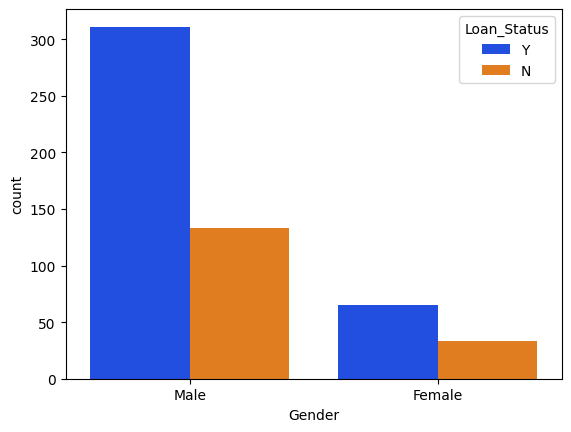

In [43]:
#Comparison between Genders in getting the Loan
#Import dependencies again to avoid error
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Loan_Status', data=loan_df, palette='bright')
print(pd.crosstab(loan_df['Gender'], loan_df['Loan_Status']))

# Show the plot
plt.show()


Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


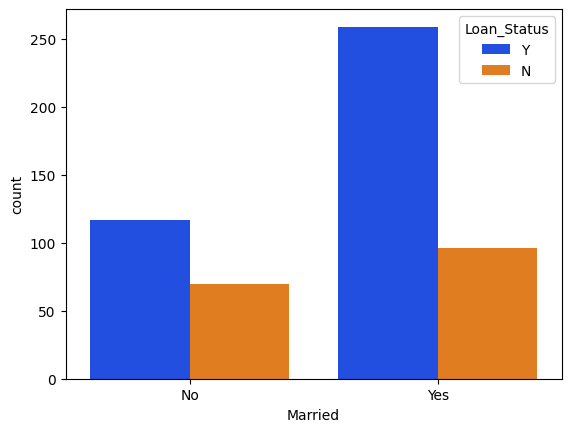

In [44]:
#Comparison between Married Status and getting the Loan
sns.countplot(x='Married', hue='Loan_Status', data=loan_df, palette='bright')
print(pd.crosstab(loan_df['Married'], loan_df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


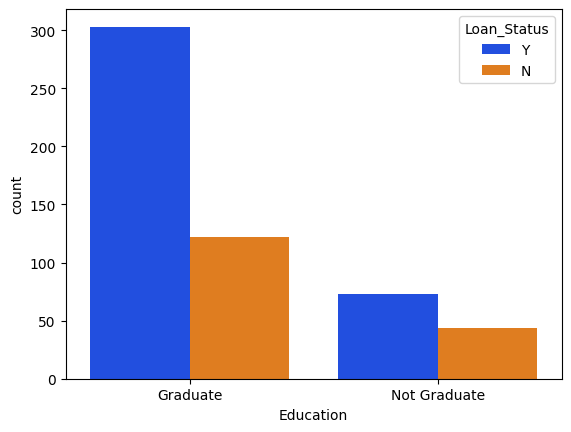

In [45]:
#Comparison between Education Status and getting the Loan
sns.countplot(x='Education', hue='Loan_Status', data=loan_df, palette='bright')
print(pd.crosstab(loan_df['Education'], loan_df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


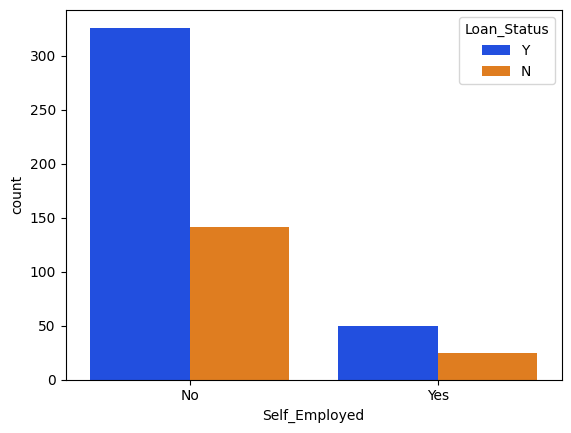

In [46]:
#Comparison between Self-Employed or Not in getting the Loan
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_df, palette='bright')
print(pd.crosstab(loan_df['Self_Employed'], loan_df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


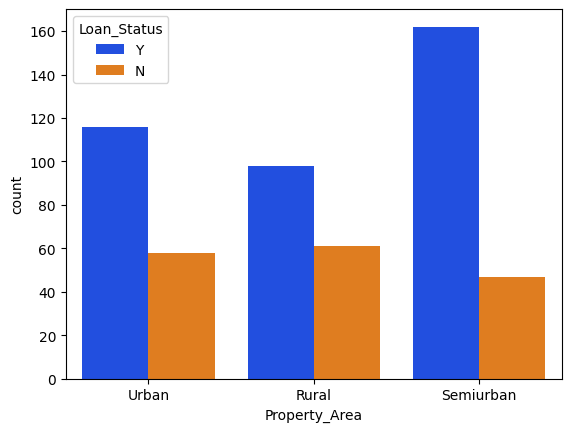

In [47]:
#Comparison between Property Area for getting the Loan
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_df, palette='bright')
print(pd.crosstab(loan_df['Property_Area'], loan_df['Loan_Status']))

## Building the model

In [48]:
loan_df['Loan_Status'].replace('Y',1,inplace=True)
loan_df['Loan_Status'].replace('N',0,inplace=True)
loan_df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [49]:
loan_df.Gender=loan_df.Gender.map({'Male':1,'Female':0})
loan_df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [50]:
loan_df.Married=loan_df.Married.map({'Yes':1,'No':0})
loan_df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [51]:
loan_df.Dependents=loan_df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
loan_df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [52]:
loan_df.Education=loan_df.Education.map({'Graduate':1,'Not Graduate':0})
loan_df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [53]:
loan_df.Self_Employed=loan_df.Self_Employed.map({'Yes':1,'No':0})
loan_df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [54]:
loan_df.Property_Area=loan_df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
loan_df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [55]:
loan_df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [56]:
loan_df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [57]:
loan_df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

In [67]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            542 non-null    object 
 1   Gender             542 non-null    int64  
 2   Married            542 non-null    int64  
 3   Dependents         542 non-null    int64  
 4   Education          542 non-null    int64  
 5   Self_Employed      542 non-null    int64  
 6   ApplicantIncome    542 non-null    int64  
 7   CoapplicantIncome  542 non-null    float64
 8   LoanAmount         542 non-null    float64
 9   Loan_Amount_Term   542 non-null    float64
 10  Credit_History     542 non-null    float64
 11  Property_Area      542 non-null    int64  
 12  Loan_Status        542 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 59.3+ KB


In [71]:
no_id_df = loan_df.drop('Loan_ID', axis=1)
no_id_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

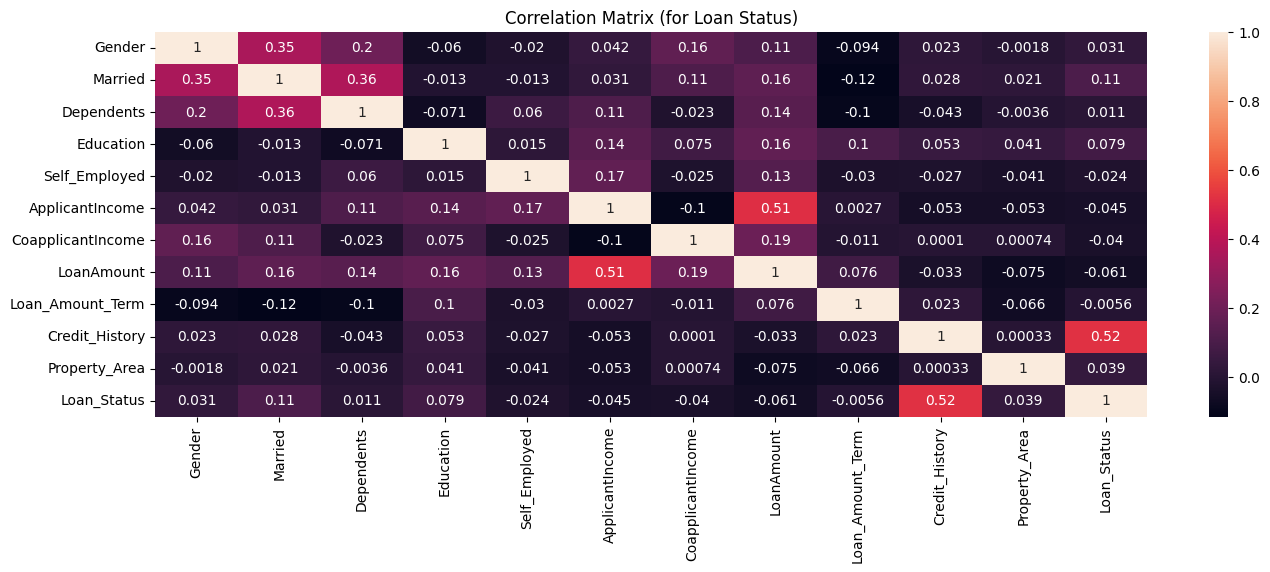

In [73]:
#Create a Correlation Matrix 
plt.figure(figsize=(16,5))
sns.heatmap(no_id_df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [74]:
#Final Display DF
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## Split The Data Into Train and Test sets

In [75]:
#
X = loan_df.iloc[1:542,1:12].values
y = loan_df.iloc[1:542,12].values

In [76]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [77]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LR_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(LR_prediction,y_test))

Logistic Regression accuracy =  0.7852760736196319


/Users/iman/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


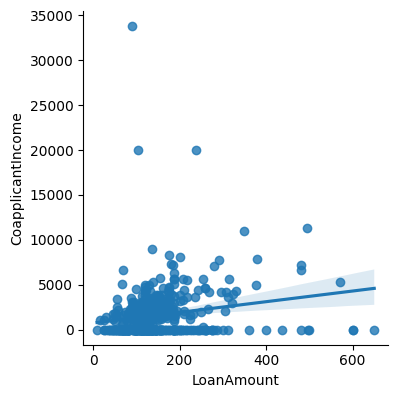

In [81]:
sns.pairplot(loan_df,x_vars = ["LoanAmount"],y_vars = ["CoapplicantIncome"],height=4,aspect =1,kind = "reg")
plt.show()

In [78]:
# Support Vector Machine (SVM)
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.6503067484662577


In [79]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.7177914110429447


In [65]:
#K-Nearest Neighbors (KNN)
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6196319018404908


# Conclusion

The Logistic Regression algorithm gave us the most accuracy of about 78%.
As for the SVM, we got about 65% accuracy. The Decision Tree gave us 71% accuracy. Finally, the KNN gave us 61% accuracy. 
 We found that the Married Male, that is not Self-Employeed but is a Graduate, has a significantly higher chance of getting approved for a housing loan. 
 We also found the credit history has a high correlation with the loan status as expected. 